Here we will see some basic functionality of plotting with Matplotlib library

In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

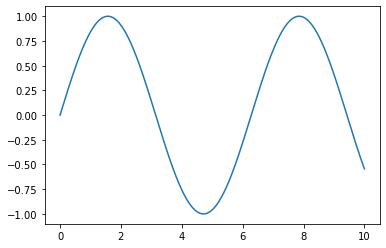

In [72]:
x = np.linspace(0, 10, 1000)

# simple plot 
plt.plot(x, np.sin(x));

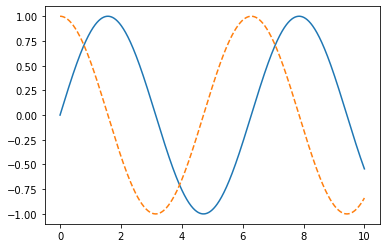

In [73]:
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

## Two styles of subploting

Text(0.5, 1.0, 'Tile')

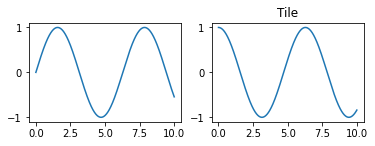

In [23]:
# Matlab subplot style
plt.subplot(2,2,1)
plt.plot(x, np.sin(x));
plt.subplot(2,2,2)
plt.plot(x, np.cos(x));
plt.title('Tile')

Text(0.5, 1.0, 'hELLO')

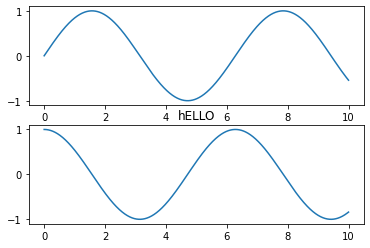

In [74]:
plt.figure()
# create a plot figure
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))
# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));
plt.title('hELLO')

Text(0.5, 1.0, 'cos')

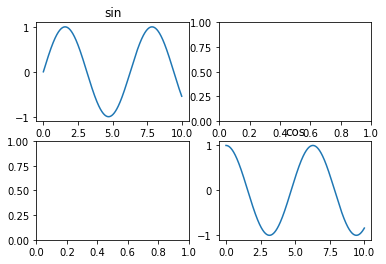

In [56]:
# OOP subplot style
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(x, np.sin(x));
axs[0,0].set_title('sin')
axs[1,1].plot(x, np.cos(x));
axs[1,1].set_title('cos')


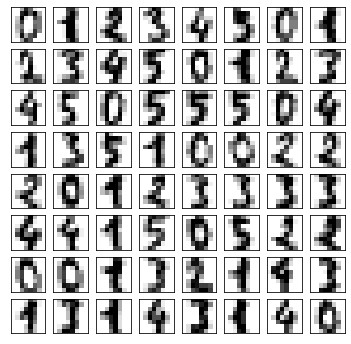

In [78]:
# Subplotting via loop

# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [62]:
# save figure 
fig.savefig('my_fig.png')

## Scatter plot

Data Available from the Minor Planet Center

source: https://minorplanetcenter.net/data

url file: https://www.minorplanetcenter.net/Extended_Files/neocp.json 
        
Explanations: Objects awaiting further observations to confirm as NEOs 

In [66]:
import json
json_file = 'neocp.json'
with open(json_file, "r") as file:
    data = json.load(file)

In [67]:
data

[{'Temp_Desig': 'I63E1If',
  'Score': 100,
  'Discovery_year': 2020,
  'Discovery_month': 2,
  'Discovery_day': 4.3,
  'R.A.': 22.2116,
  'Decl.': 35.2371,
  'V': 29.5,
  'Updated': 'Added Feb. 10.68 UT',
  'NObs': 7,
  'Arc': 0.03,
  'H': 30.7,
  'Not_Seen_dys': 8.017},
 {'Temp_Desig': 'ZTF0D86',
  'Score': 100,
  'Discovery_year': 2020,
  'Discovery_month': 2,
  'Discovery_day': 7.5,
  'R.A.': 18.6784,
  'Decl.': 18.1084,
  'V': 20.7,
  'Updated': 'Updated Feb. 10.68 UT',
  'NObs': 4,
  'Arc': 0.05,
  'H': 21.9,
  'Not_Seen_dys': 4.817},
 {'Temp_Desig': 'P10XEUN',
  'Score': 75,
  'Discovery_year': 2020,
  'Discovery_month': 2,
  'Discovery_day': 5.6,
  'R.A.': 13.4532,
  'Decl.': -29.2894,
  'V': 21.8,
  'Updated': 'Updated Feb. 10.68 UT',
  'NObs': 7,
  'Arc': 0.75,
  'H': 15.7,
  'Not_Seen_dys': 5.997},
 {'Temp_Desig': 'P10XEUM',
  'Score': 60,
  'Discovery_year': 2020,
  'Discovery_month': 2,
  'Discovery_day': 5.6,
  'R.A.': 13.3793,
  'Decl.': -29.8693,
  'V': 21.7,
  'Updated'

In [68]:
ra = []
dec = []
z = []
for obj in data:
    ra.append(obj['R.A.'])
    dec.append(obj['Decl.'])
    z.append(obj['Arc'])
z = np.asanyarray(z)

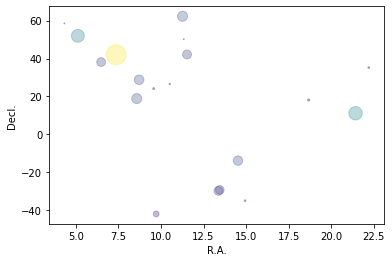

In [69]:
# simple scatter plot
min_size = np.min(z)
sc = 1/min_size 
sizes = z * sc
colors = z

# object orientet approach
fig, axes = plt.subplots()
axes.scatter(ra, dec, c = z, alpha=0.3, s = sizes, cmap='viridis');
axes.set_xlabel('R.A.')
axes.set_ylabel('Decl.');

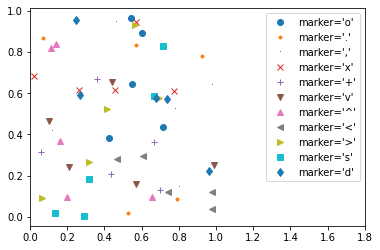

In [70]:
# markers diversity
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
    label="marker='{0}'".format(marker))
    plt.legend(numpoints=1)
    plt.xlim(0, 1.8)

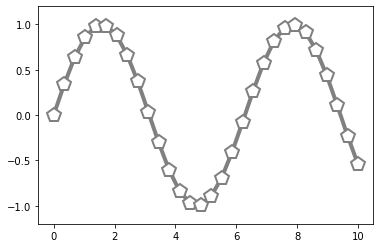

In [71]:
# more marker style 
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, '-p', color='gray',
markersize=15, linewidth=4,
markerfacecolor='white',
markeredgecolor='gray',
markeredgewidth=2)
plt.ylim(-1.2, 1.2);

## Titles, text, annotations, arrows 

In [84]:
# Plot adjusments - toy example of dictionary usage
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# Add labels to the plot
style = dict(size=10, color='gray')

#ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)

Dataset can be downloaded from
https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv.

<ipython-input-80-d6ee8155f32e>:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


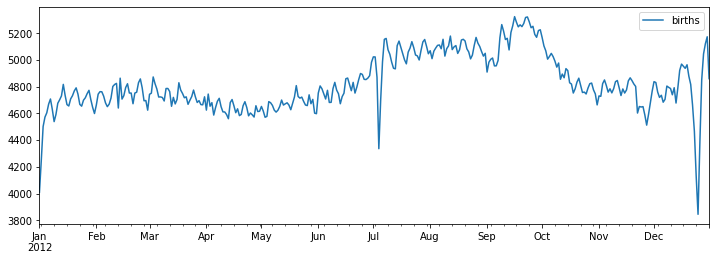

In [80]:
births = pd.read_csv('births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])

mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int) 

births.index = pd.to_datetime(10000 * births.year +
100 * births.month +
births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
[births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
for (month, day) in births_by_date.index]
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In [81]:
births.head()

,year,month,day,gender,births
1969-01-01,1969,1,1,F,4046
1969-01-01,1969,1,1,M,4440
1969-01-02,1969,1,2,F,4454
1969-01-02,1969,1,2,M,4548
1969-01-03,1969,1,3,F,4548


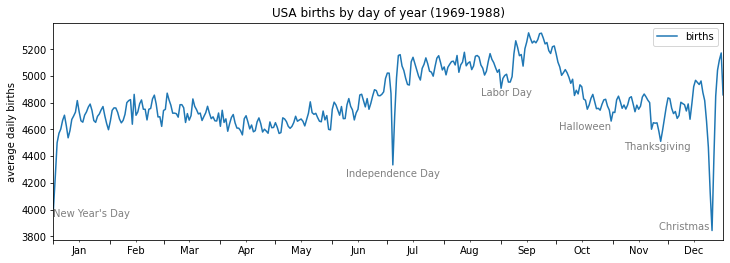

In [82]:
import matplotlib as mpl # NOTE! Just Matolotlib is importing

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)
# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
ylabel='average daily births')
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

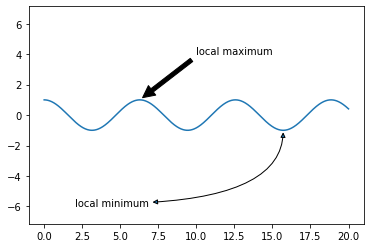

In [83]:
# Nice arrows
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),

arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),

arrowprops=dict(arrowstyle="<|-|>",
connectionstyle="angle3,angleA=0,angleB=-90"));